## Set Up

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Get the data

In [9]:
SMSs = pd.read_csv('spam.csv', encoding='latin-1')
SMSs = SMSs[['v1', 'v2']].rename(columns={'v1': 'ham/spam', 'v2': 'content'})
SMSs = SMSs.sample(frac=1)
SMSs.shape

(5572, 2)

## Split the data

In [10]:
split = int(SMSs.shape[0]*0.66)
ds_train = SMSs.loc[:split, 'content'].to_numpy()
ds_test = SMSs.loc[split+1:, 'content'].to_numpy()
train_labels = SMSs.loc[:split, 'ham/spam'].apply(lambda x: 1 if x=='spam' else 0).to_numpy()
test_labels = SMSs.loc[split+1:, 'ham/spam'].apply(lambda x: 1 if x=='spam' else 0).to_numpy()
ds_train[0], train_labels[0]

('Ok lor. Anyway i thk we cant get tickets now cos like quite late already. U wan 2 go look 4 ur frens a not? Darren is wif them now...',
 0)

## Preprocess the data

In [11]:
max_length = 50
vocab_size = 5000
embedding_size = 20

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(ds_train)

np.append(ds_test,"YES! The only place in town to meet exciting adult singles is now in the UK. Txt CHAT to 86688 now! 150p/Msg.")
np.append(test_labels,0)

train_sentences = tokenizer.texts_to_sequences(ds_train)
train_sequences = pad_sequences(train_sentences, maxlen=max_length, padding='post', truncating='post')

test_sentences = tokenizer.texts_to_sequences(ds_test)
test_sequences = pad_sequences(test_sentences, maxlen=max_length, padding='post', truncating='post')

train_sequences.shape, test_sequences.shape


((5452, 50), (3105, 50))

## Define function to fit the model and show the results

## Use a bidirectionnal GRU model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 20)          100000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                10368     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 110,433
Trainable params: 110,433
Non-trainable params: 0
_________________________________________________________________


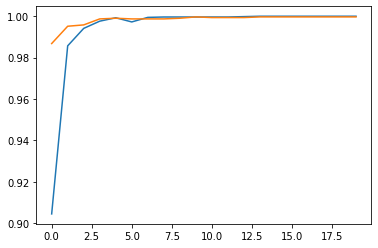

False
True
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
True
False
True
True
False
False
True
False
False
False
False
False
True
False
False
False
False
False
True
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [12]:
model_gru = tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, embedding_size),
                            tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy')
model_gru.summary()
history = model_gru.fit(train_sequences, train_labels, epochs=20, validation_data=(test_sequences, test_labels), verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
classes = model_gru.predict(test_sequences)
for i in classes:
    print(round(i[0])==1)

In [13]:
spamcheck=["YES! The only place in town to meet exciting adult singles is now in the UK. Txt CHAT to 86688 now! 150p/Msg."]

test_sentences = tokenizer.texts_to_sequences(spamcheck)
test_sequences = pad_sequences(test_sentences, maxlen=max_length, padding='post', truncating='post')

vals = model_gru.predict(test_sequences)
for i in vals:
    print(round(i[0])==1)

True


In [14]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
model_gru.save('spamModel.h5')
with open('mypickle.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)